<a href="https://colab.research.google.com/github/kebscharry/CharityMomanyi/blob/main/Updated_Data_Cleaning_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Cleaning

## Specific learning outcomes
By the end of this topic the learner should be able to:

1. Examine the given dataset to uncover outliers, missing values and patterns that affect data interpretation.
2. Prepare different types of data sets in readiness for analysis

## Introduction
Data cleaning is an essential step in the data analysis process. It involves preparing the data for analysis by addressing various issues that could affect the quality and reliability of the results. This includes handling missing values, correcting data types, dealing with out-of-range values, and ensuring the consistency and accuracy of the data. The goal is to create a clean dataset that accurately represents the underlying phenomena and can be used confidently for subsequent analysis steps.

In this module, we will use the NHANES dataset to demonstrate common data cleaning techniques. We will insert some errors into the original data file to illustrate these techniques. The cleaned data will be exported for further analysis.


# Data Loading

Load the NHANES dataset and display the first few rows.

In [1]:
import pandas as pd

# Load the NHANES dataset
df = pd.read_csv('../content/nhanes_reduced .csv')
df.head()

# Display the first few rows of the dataframe
df.head()

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Education,MaritalStatus,HHIncome,HHIncomeMid,...,PhysActiveDays,TVHrsDay,SleepHrsNight,SleepTrouble,CompHrsDay,TVHrsDayChild,CompHrsDayChild,SmokeNow,Smoke100,Smoke100n
0,51624,2009_10,male,34,30-39,409.0,High School,Married,25000-34999,30000.0,...,NaN,NaN,4.0,Yes,NaN,NaN,NaN,No,Yes,Smoker
1,51625,2009_10,male,4,0-9,49.0,NaN,NaN,20000-24999,22500.0,...,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN
2,51630,2009_10,female,49,40-49,596.0,Some College,LivePartner,35000-44999,40000.0,...,NaN,NaN,8.0,Yes,NaN,NaN,NaN,Yes,Yes,Smoker
3,51638,2009_10,male,9,0-9,115.0,NaN,NaN,75000-99999,87500.0,...,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN
4,51646,2009_10,male,8,0-9,101.0,NaN,NaN,55000-64999,60000.0,...,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN


In [ ]:
# Get a subset of the data leaving out some variables.
df = df.loc[:, 'ID':'SmokeAge']

# Data Cleaning / Identifying Inconsistencies

Identify inconsistencies in the dataset.

The data information will show us the structure of the dataframe, including the column names, non-null counts, and data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                10000 non-null  int64  
 1   SurveyYr          10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   AgeDecade         9667 non-null   object 
 5   AgeMonths         4962 non-null   float64
 6   Race1             10000 non-null  object 
 7   Race3             5000 non-null   object 
 8   Education         7221 non-null   object 
 9   MaritalStatus     7231 non-null   object 
 10  HHIncome          9189 non-null   object 
 11  HHIncomeMid       9189 non-null   float64
 12  Poverty           9274 non-null   float64
 13  HomeRooms         9931 non-null   float64
 14  HomeOwn           9937 non-null   object 
 15  Work              7771 non-null   object 
 16  Weight            9922 non-null   float64

# Introduce some dirt into the data

*We use the NHANES data to demonstrate data cleaning. We start by inserting some errors in the original data file, and then clean the dirty file.*

- Dirtify gender by adding some gender values e.g M/f/m/F
- Add 'cm' to height
- replace some values in the sleep hours night column with unusually high values
- convert "Education" and "SurveyYr" to string

In [ ]:
df.loc[1:10, 'Gender'] = ['M','m','F','f','Female','M','Female','Male','m','F']
df['Gender'].value_counts()

Gender
female    5016
male      4974
M            2
m            2
F            2
Female       2
f            1
Male         1
Name: count, dtype: int64

In [ ]:
# Adding units (cm) to "Height" and storing it in a new column: "Height_cm"
df['Height_cm'] = df['Height'].astype(str) + 'cm'

# Displaying the first few rows to verify the new column
df[['Height', 'Height_cm']].head()

,Height,Height_cm
0,164.7,164.7cm
1,164.7,164.7cm
2,164.7,164.7cm
3,105.4,105.4cm
4,168.4,168.4cm


In [ ]:
df.drop('Height',axis='columns',inplace=True)

In [ ]:
# Replacing some entries in "SleepHrsNight" with unusually high values
df.loc[[10, 29, 9988], 'SleepHrsNight'] = [17, 21, 24]

# Summary statistics for "SleepHrsNight" before correction
df['SleepHrsNight'].describe()

count    7755.000000
mean        6.933462
std         1.374144
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        24.000000
Name: SleepHrsNight, dtype: float64

In [ ]:
#convert "Education" and "SurveyYr" to string
df['SurveyYr'] = df['SurveyYr'].astype(str)
df['Education'] = df['Education'].astype(str)

## Data type conversion
Data type conversion is a fundamental step in data cleaning and preparation. Ensuring that variables are in the correct format is crucial for accurate analysis. In python, variables can be of various data types such as
- string
- integer
- float
- boolean
- categorical
- datetime

Variables may sometimes be stored as the wrong data type.

It's essential to convert variables to the appropriate data type based on their nature and the analysis tasks at hand.

For example, categorical variables should be converted to category, while numeric variables should be converted to float data types for numerical calculations. Using the as.type() function facilitates the conversion process.

Before proceeding with analysis, it's important to check the data types using tools like info() or describe() to ensure consistency and accuracy.

It is often necessary to convert to the correct data type as required by the analysis.

In this case we convert "Education" from string to  "category" since it is a categorical variable yet it is of class "string" in the dataframe.

The summary statistics will not be produced correctly if Education is of type string.

In [ ]:
df['Education'] = df['Education'].astype('category')
df['SurveyYr'] = df['SurveyYr'].astype('category')

### Exercises:

1. Convert the SurveyYr variable to a category and verify the conversion.
2. Convert the AgeMonths variable to an integer and verify the conversion.
3. Convert the MaritalStatus variable to a category and provide a summary of the categories

# Display a Peek of the Data

Show the first few rows of the dataset.

In [ ]:
df.head()

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Height_cm
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,NaN,NaN,Yes,NaN,0.0,No,Yes,Smoker,18.0,164.7cm
1,51624,2009_10,M,34,30-39,409.0,White,NaN,High School,Married,...,NaN,NaN,Yes,NaN,0.0,No,Yes,Smoker,18.0,164.7cm
2,51624,2009_10,m,34,30-39,409.0,White,NaN,High School,Married,...,NaN,NaN,Yes,NaN,0.0,No,Yes,Smoker,18.0,164.7cm
3,51625,2009_10,F,4,0-9,49.0,Other,NaN,nan,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.4cm
4,51630,2009_10,f,49,40-49,596.0,White,NaN,Some College,LivePartner,...,NaN,NaN,Yes,2.0,20.0,Yes,Yes,Smoker,38.0,168.4cm


# Summary of the Data

Show descriptive statistics for numerical columns and class distributions for categorical columns.

In [ ]:
df.describe(include='all')

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Height_cm
count,10000.00000,10000,10000,10000.000000,9667,4962.000000,10000,5000,10000,7231,...,653.000000,653.000000,6580,4914.000000,5922.000000,3211,7235,7235,3080.000000,10000
unique,NaN,2,8,NaN,8,NaN,5,6,6,6,...,NaN,NaN,2,NaN,NaN,2,2,2,NaN,981
top,NaN,2009_10,female,NaN,40-49,NaN,White,White,nan,Married,...,NaN,NaN,Yes,NaN,NaN,No,No,Non-Smoker,NaN,nancm
freq,NaN,5000,5016,NaN,1398,NaN,6372,3135,2779,3945,...,NaN,NaN,5212,NaN,NaN,1745,4024,4024,NaN,353
mean,61944.64380,NaN,NaN,36.742100,NaN,420.123942,NaN,NaN,NaN,NaN,...,1.938744,2.197550,NaN,2.914123,75.101655,NaN,NaN,NaN,17.826623,NaN
std,5871.16716,NaN,NaN,22.397566,NaN,259.043091,NaN,NaN,NaN,NaN,...,1.434431,2.516667,NaN,3.182672,103.033738,NaN,NaN,NaN,5.326660,NaN
min,51624.00000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,6.000000,NaN
25%,56904.50000,NaN,NaN,17.000000,NaN,199.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,NaN,1.000000,3.000000,NaN,NaN,NaN,15.000000,NaN
50%,62159.50000,NaN,NaN,36.000000,NaN,418.000000,NaN,NaN,NaN,NaN,...,2.000000,1.000000,NaN,2.000000,24.000000,NaN,NaN,NaN,17.000000,NaN
75%,67039.00000,NaN,NaN,54.000000,NaN,624.000000,NaN,NaN,NaN,NaN,...,3.000000,6.000000,NaN,3.000000,104.000000,NaN,NaN,NaN,19.000000,NaN


### Cleaning the dirtified entries

In real-world data sets, variables may contain both numeric values and accompanying text, such as units of measurement. When performing numerical calculations, it’s necessary to extract the numeric values from these variables. Functions like str.replace() allows us to remove specific patterns, such as text or units, from variables, leaving only the numeric values.

This process ensures that variables are in a format suitable for numerical analysis. For example, removing units from measurements like height or weight enables us to perform mathematical operations on these variables effectively.

The Height_cm variable includes the units of measurement To obtain just the numeric variable we need to extract the text “cm” from each value and keep only the numerical data.

In [ ]:
df['Height_cm'] = pd.to_numeric(df['Height_cm'].str.replace('cm',''), errors='coerce')
df['Height_cm'].describe()

count    9647.000000
mean      161.877838
std        20.186567
min        83.600000
25%       156.800000
50%       166.000000
75%       174.500000
max       200.400000
Name: Height_cm, dtype: float64

In [ ]:
df['Height_cm'].dropna().mean()

161.8778376697419

### Exercises:

1.Remove the text "kg" from a weight variable and convert it to numeric.

2.Extract numeric values from a variable that includes percentage signs.

3.Remove currency symbols from a financial variable and convert it to numeric.

## Range Constraints

Identifying and handling out-of-range values is critical for ensuring data quality and reliability. Out-of-range values can arise due to errors in data collection or entry and can significantly impact the results of analysis.

Techniques such as summarizing data using summary statistics, visualizing data using histograms or box plots, and setting domain-specific thresholds help identify out-of-range values.

Once identified, these values can be replaced with more realistic values or treated as missing data, depending on the context. Consulting domain experts is essential for determining acceptable ranges for variables and making informed decisions about handling out-of-range values.

count    7755.000000
mean        6.933462
std         1.374144
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        24.000000
Name: SleepHrsNight, dtype: float64
9988    24.0
29      21.0
10      17.0
151     12.0
1524    12.0
3025    12.0
3266    12.0
3365    12.0
3453    12.0
3454    12.0
Name: SleepHrsNight, dtype: float64


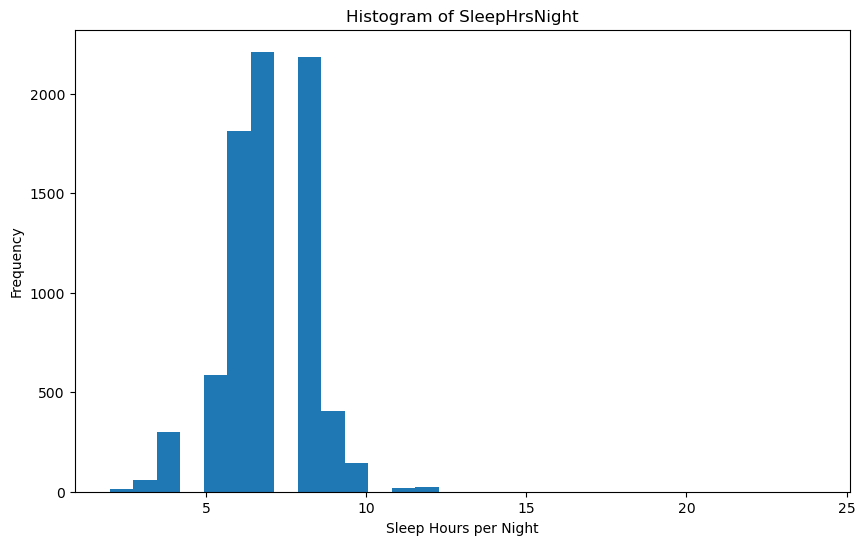

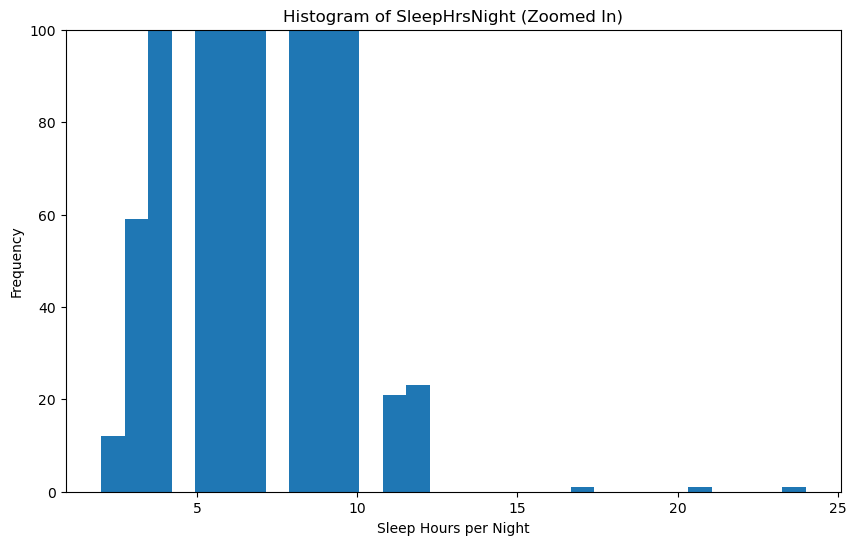

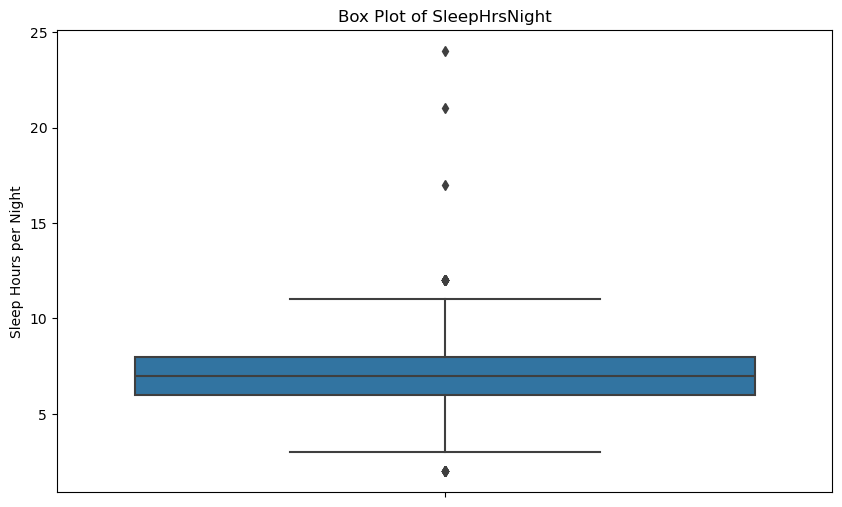

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get summary statistics of SleepHrsNight
print(df['SleepHrsNight'].describe())

#The maximum value is 24 hours, it is unlikely that one sleeps more than 12 hours a day
#The minimum value of 2 hours also is unusual by not impossible

# Check the top 10 largest values for SleepHrs to see if there are any other unusual values
top_10_sleep = df['SleepHrsNight'].nlargest(10)
print(top_10_sleep)

#observe that top three  values (24,21,17) are unusually high.
#We can also use a histogram to check for any out of range contraints

# Create breaks to check for negative values as well as unusually high values
breaks = [df['SleepHrsNight'].min(), 0, 12, 14, 17, 20, df['SleepHrsNight'].max()]

# Create a histogram of SleepHrsNight to check if there are any out of range values
plt.figure(figsize=(10, 6))
plt.hist(df['SleepHrsNight'].dropna(), bins=30)
plt.title('Histogram of SleepHrsNight')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Frequency')
plt.show()

# Zoom in on the y axis to get a better view
#This is necessary to view the bars with very low counts
plt.figure(figsize=(10, 6))
plt.hist(df['SleepHrsNight'].dropna(), bins=30)
plt.ylim(0, 100)
plt.title('Histogram of SleepHrsNight (Zoomed In)')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Frequency')
plt.show()

#histogram confirms no negative values but shows some unusually high values of more than 15 hours sleep

# Get the maximum value using the max() function
max_sleep = df['SleepHrsNight'].max(skipna=True)


# Use a box plot to check for any unusually high values
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['SleepHrsNight'])
plt.title('Box Plot of SleepHrsNight')
plt.ylabel('Sleep Hours per Night')
plt.show()

##Replace values that are out of range

Out of range values can be replaced by missing values or by replaced by more realistic values such as the median of the variable.

This decision has to be made in consultation with those who collected or understand the data better.

In some instances the out of range cases will be omitted from the analysis

In [ ]:
# Correcting out-of-range values in "SleepHrsNight"
#replace values of SleepHrsNight > 17 with MEDIAN of SleepHrsNight
median_sleep_hours = df['SleepHrsNight'].median()
df['SleepHrsNight_corrected'] = df['SleepHrsNight'].apply(lambda x: median_sleep_hours if x > 12 else x)
df['SleepHrsNight_corrected'].describe()

# observe that the maximum value is now 12
# Check that sure all values of SleepHrsNight_corrected are between 0 and 12

count    7755.000000
mean        6.928175
std         1.346141
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: SleepHrsNight_corrected, dtype: float64

### Excercises
1.Identify and correct out-of-range values for the Weight variable.
2. Use a histogram to visualize the distribution of the Age variable and identify any unusual values.
3. Replace out-of-range values in the Height variable with the median height.

## Duplicates and unique values

Ensuring the uniqueness of records in a data set is essential for maintaining data integrity and accuracy. Duplicates in the data set can lead to biased analysis results and misinterpretation of findings. Techniques such as identifying duplicates using functions like `duplicated()` and removing duplicates using `drop_duplicates()` help eliminate redundant records.
Full duplicates are observations with exactly the same values for all variables.



Partial duplicates, where some variables may differ while others remain the same, require careful consideration and may involve additional data cleaning steps. Collaborating with domain experts and stakeholders is crucial for understanding the underlying reasons for duplicate records and implementing appropriate solutions.


We start by checking for full duplicates in the data
#### Check for Duplicate Rows

Identify and display duplicate rows in the dataset.

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Height_cm,SleepHrsNight_corrected
21,51685,2009_10,female,56,50-59,677.0,White,NaN,College Grad,Married,...,NaN,Yes,1.0,12.0,NaN,No,Non-Smoker,NaN,170.7,7.0
24,51692,2009_10,male,54,50-59,655.0,Hispanic,NaN,College Grad,Divorced,...,NaN,Yes,2.0,156.0,NaN,No,Non-Smoker,NaN,177.1,6.0
33,51711,2009_10,female,59,50-59,718.0,Other,NaN,8th Grade,Widowed,...,NaN,NaN,NaN,NaN,NaN,No,Non-Smoker,NaN,145.1,5.0
36,51718,2009_10,female,51,50-59,614.0,Mexican,NaN,College Grad,Married,...,NaN,Yes,1.0,24.0,NaN,No,Non-Smoker,NaN,163.8,7.0
39,51720,2009_10,male,12,10-19,152.0,Other,NaN,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,71855,2011_12,female,62,60-69,NaN,White,White,High School,Married,...,NaN,Yes,NaN,0.0,No,Yes,Smoker,21.0,166.1,10.0
9978,71868,2011_12,male,43,40-49,NaN,Mexican,Mexican,High School,Married,...,NaN,Yes,5.0,4.0,No,Yes,Smoker,16.0,173.6,6.0
9980,71869,2011_12,male,69,60-69,NaN,White,White,College Grad,Married,...,NaN,No,NaN,0.0,Yes,Yes,Smoker,19.0,173.6,8.0
9994,71909,2011_12,male,28,20-29,NaN,Mexican,Mexican,9 - 11th Grade,NeverMarried,...,NaN,NaN,NaN,NaN,Yes,Yes,Smoker,18.0,177.3,6.0


# Unique Entries

Use columns ID and SurveyYr to identify unique entries.

In [ ]:
unique_entries = df.drop_duplicates(subset=['ID', 'SurveyYr'])
unique_entries

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Height_cm,SleepHrsNight_corrected
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,NaN,Yes,NaN,0.0,No,Yes,Smoker,18.0,164.7,4.0
3,51625,2009_10,F,4,0-9,49.0,Other,NaN,nan,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.4,NaN
4,51630,2009_10,f,49,40-49,596.0,White,NaN,Some College,LivePartner,...,NaN,Yes,2.0,20.0,Yes,Yes,Smoker,38.0,168.4,8.0
5,51638,2009_10,Female,9,0-9,115.0,White,NaN,nan,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.1,NaN
6,51646,2009_10,M,8,0-9,101.0,White,NaN,nan,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,71908,2011_12,female,66,60-69,NaN,White,White,College Grad,Widowed,...,NaN,No,1.0,5.0,NaN,No,Non-Smoker,NaN,159.0,6.0
9993,71909,2011_12,male,28,20-29,NaN,Mexican,Mexican,9 - 11th Grade,NeverMarried,...,NaN,NaN,NaN,NaN,Yes,Yes,Smoker,18.0,177.3,6.0
9996,71910,2011_12,female,0,0-9,5.0,White,White,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,71911,2011_12,male,27,20-29,NaN,Mexican,Mexican,College Grad,Married,...,NaN,Yes,5.0,4.0,NaN,No,Non-Smoker,NaN,175.8,6.0


## Categorical Variables
Categorical variables play a significant role in many analyses, but inconsistencies in labels or categories can lead to errors and misinterpretation of results.

Ensuring consistency in categorical variables involves identifying and correcting inconsistencies in labels or collapsing categories with low frequencies.

Techniques such as relabeling categories, collapsing categories into broader groups, and validating categorical variables against external sources help maintain data consistency.

Clear documentation of variable definitions and categories is essential for ensuring transparency and reproducibility in analysis.

In [ ]:
# create a dictionary map to clean gender category
gender_dict = {
    'female':'female',
    'male':'male',
    'Female':'female',
    'Male':'male',
    'm': 'male',
    'M': 'male',
    'f': 'female',
    'F': 'female'
}

df['Gender'].map(gender_dict).value_counts()

Gender
female    5021
male      4979
Name: count, dtype: int64

# Category Collapsing

Collapse education column where entry mentions 'college' into one category 'college'.


It is sometimes necessary to collapse several categories into one
This can be occasioned by some categories having very low counts
or the need to combine some categories for a certain purpose.
We will do this with the `Education` variable


In [ ]:
df['Education'] = df['Education'].str.replace(r'.*college.*', 'college', case=False)
df['Education'] = df['Education'].astype('category')

### Exercises
1. Relabel inconsistent entries in the Work variable to ensure uniformity.
2. Collapse low-frequency categories in the MaritalStatus variable into a single category called "Other".
3. Validate that all entries in the Education variable match a predefined list of acceptable values.


## Missing Data
Missing data is a common challenge in real-world datasets and can significantly impact analysis results if not handled appropriately. Understanding the patterns and reasons for missingness is crucial for selecting appropriate handling techniques.

Visualization tools like heatmaps or missing data plots help identify patterns of missingness and inform decision-making regarding missing data handling.

Techniques such as imputation, excluding incomplete cases, or using advanced modeling approaches help address missing data effectively. Clear documentation of missing data handling procedures is essential for transparency and reproducibility in analysis.


Visualize the distribution of missing values across columns.

### Heatmap of Missing Values

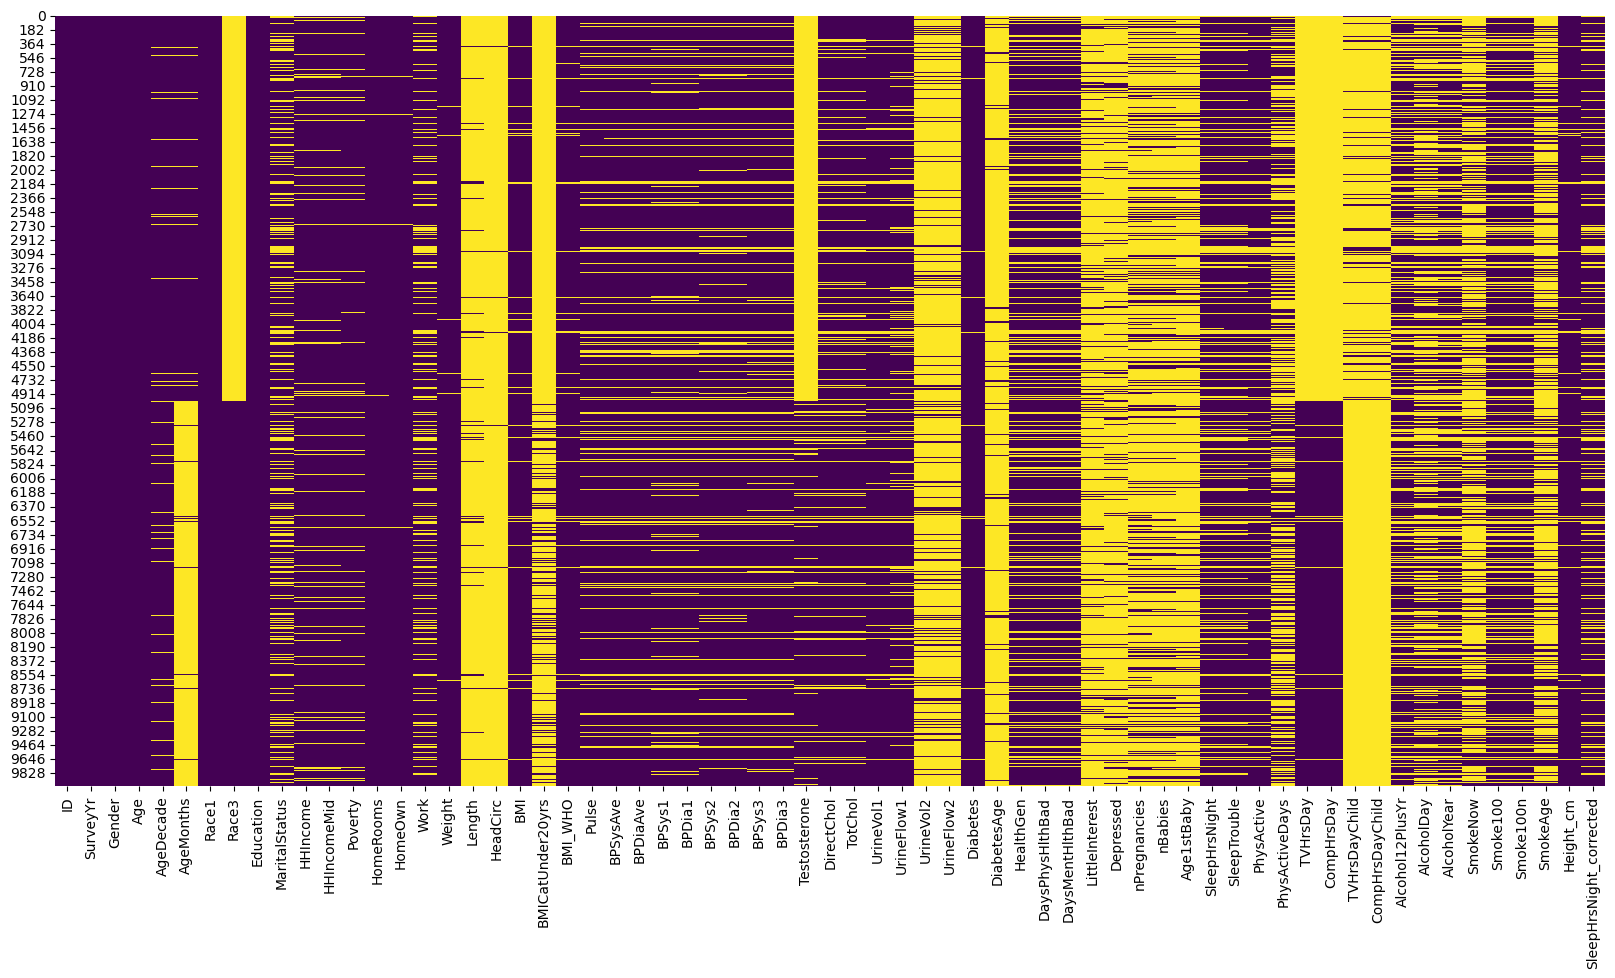

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

## Variable Selection

Variable selection is a critical step in the data analysis process, where relevant variables are chosen for further exploration and analysis. Selection criteria may include domain knowledge, research questions, statistical significance, or practical considerations.

Techniques such as exploratory data analysis, statistical modeling, or machine learning algorithms assist in identifying relevant variables. Selecting a subset of variables for analysis helps focus resources and efforts on the most informative aspects of the dataset, leading to more meaningful insights and conclusions.



### Subset Relevant Columns

Select a subset of columns relevant for further analysis.

In [ ]:
subset_df = df[['ID', 'SurveyYr', 'Gender', 'Age', 'Education', 'Race1', 'Weight', 'BMI', 'SleepHrsNight','HHIncome','Work']]
subset_df.head()

,ID,SurveyYr,Gender,Age,Education,Race1,Weight,BMI,SleepHrsNight,HHIncome,Work
0,51624,2009_10,male,34,High School,White,87.4,32.22,4.0,25000-34999,NotWorking
1,51624,2009_10,M,34,High School,White,87.4,32.22,4.0,25000-34999,NotWorking
2,51624,2009_10,m,34,High School,White,87.4,32.22,4.0,25000-34999,NotWorking
3,51625,2009_10,F,4,nan,Other,17.0,15.30,NaN,20000-24999,NaN
4,51630,2009_10,f,49,Some College,White,86.7,30.57,8.0,35000-44999,NotWorking


#Exporting Cleaned Data

Exporting cleaned data is the final step in the data cleaning process, where the processed dataset is saved for further analysis or sharing.

Saving cleaned data in a standard format such as CSV or Excel ensures compatibility with a wide range of analysis tools and platforms.

Clear documentation of data cleaning steps, variable definitions, and any transformations applied are essential for ensuring reproducibility and transparency in analysis.

Additionally, maintaining backups of cleaned data and version control helps preserve data integrity and facilitates collaboration among team members.

Create a CSV file with the cleaned dataset.

In [ ]:
subset_df.to_csv('./Curriculum ENGAGE/nhanes_reduced.csv', index=False)

##  Summary
In this module, we covered essential data cleaning techniques using the NHANES dataset. Data cleaning is crucial for ensuring the accuracy and reliability of the analysis results.

The steps included data type conversion, removing text from numeric data, handling out-of-range values, ensuring uniqueness, ensuring consistency in categorical variables, handling missing data, selecting relevant variables, and exporting the cleaned data.

Each step was illustrated with R code, and exercises were provided to reinforce the concepts. Proper data cleaning lays the foundation for robust and reliable data analysis, leading to more accurate and meaningful insights.


## References

1. Wickham, H., & Grolemund, G. (2017). R for Data Science: Import, Tidy, Transform, Visualize, and Model Data. O'Reilly Media.
